Generating EDA Charts...


/var/folders/dv/hsrvsn153lx15srhcq05crhh0000gn/T/ipykernel_15326/2368643881.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="sepal width (cm)", data=df, palette="viridis") # This line will now work
/var/folders/dv/hsrvsn153lx15srhcq05crhh0000gn/T/ipykernel_15326/2368643881.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="magma") # This line will now work


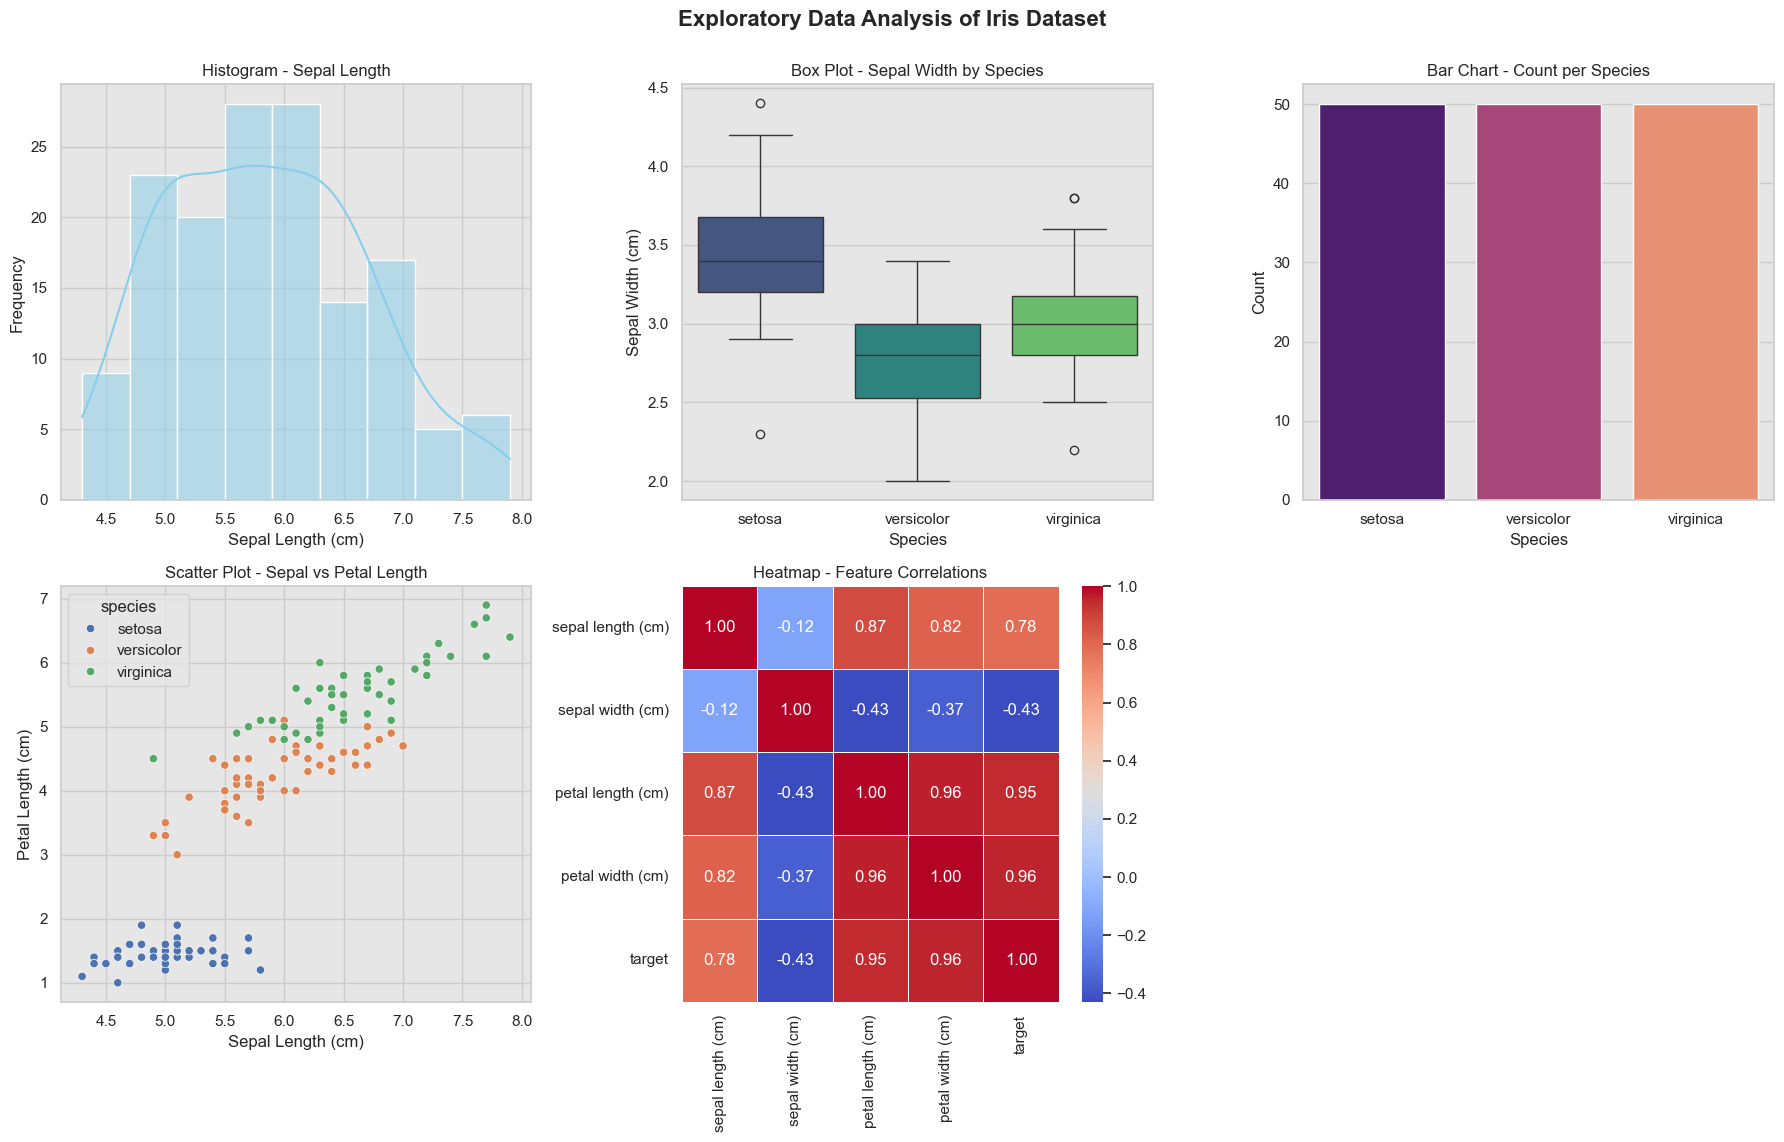

Generating Pair Plot...


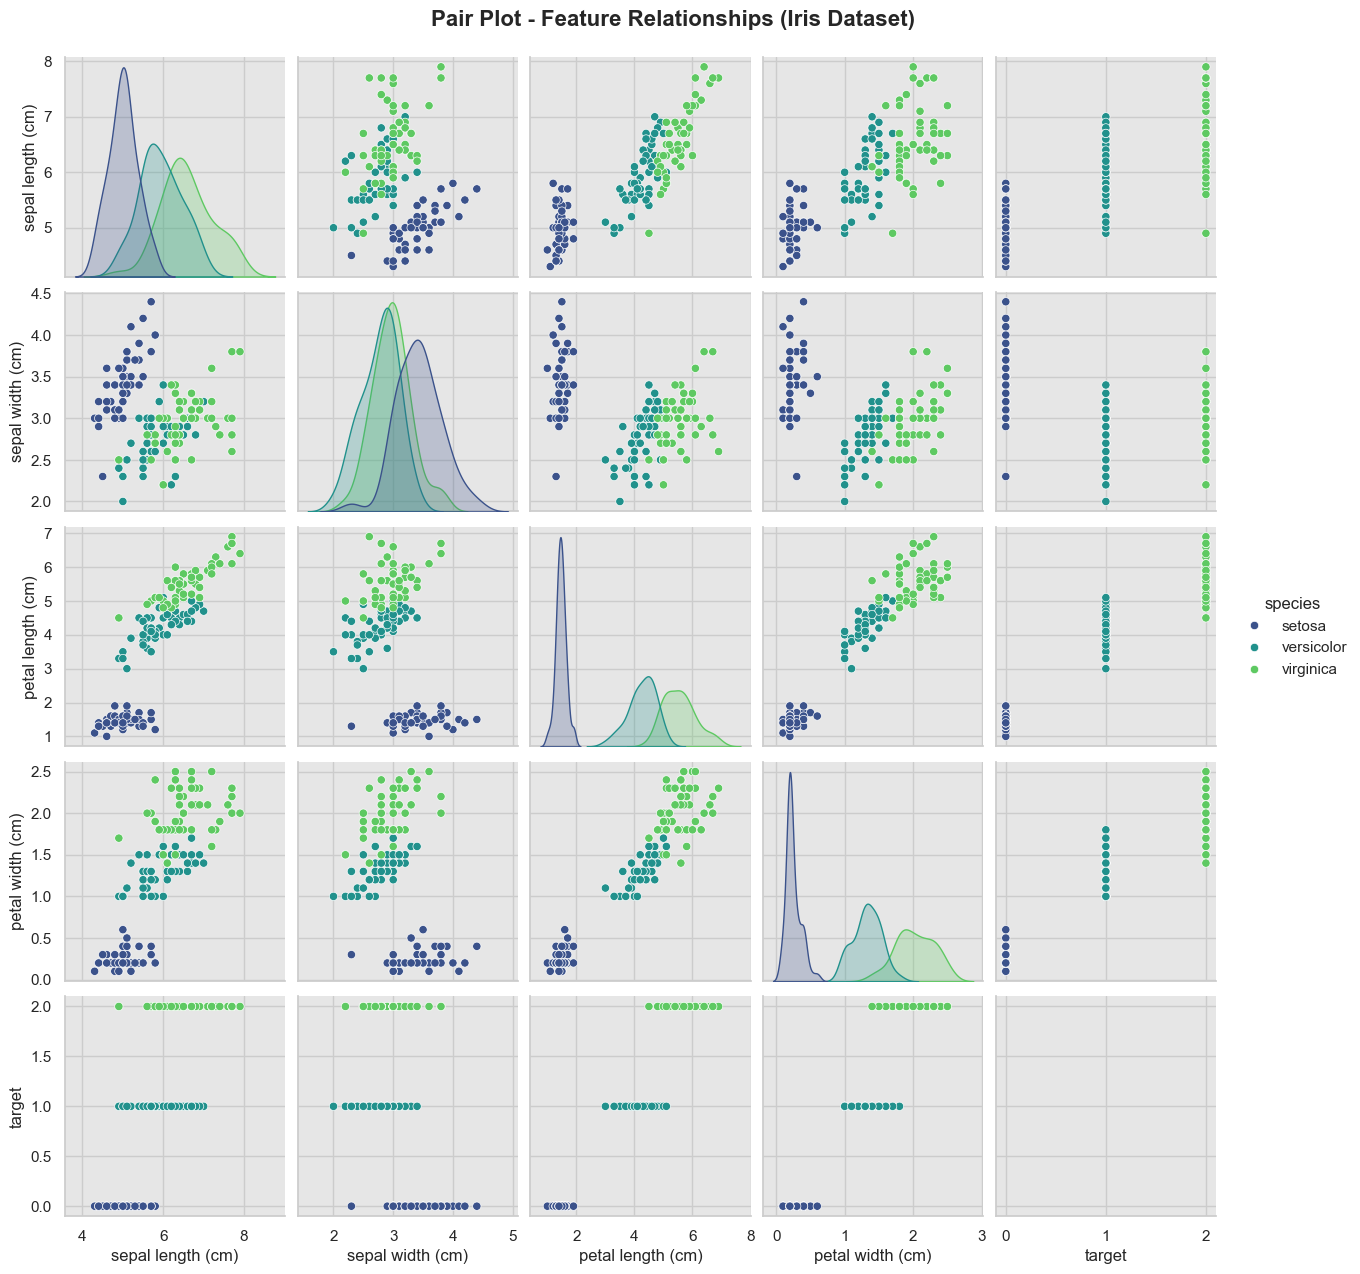


Generating Model Evaluation Charts...


/var/folders/dv/hsrvsn153lx15srhcq05crhh0000gn/T/ipykernel_15326/2368643881.py:100: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {np.trapz(tpr, fpr):.2f})', color='darkorange')
/var/folders/dv/hsrvsn153lx15srhcq05crhh0000gn/T/ipykernel_15326/2368643881.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Classifier')


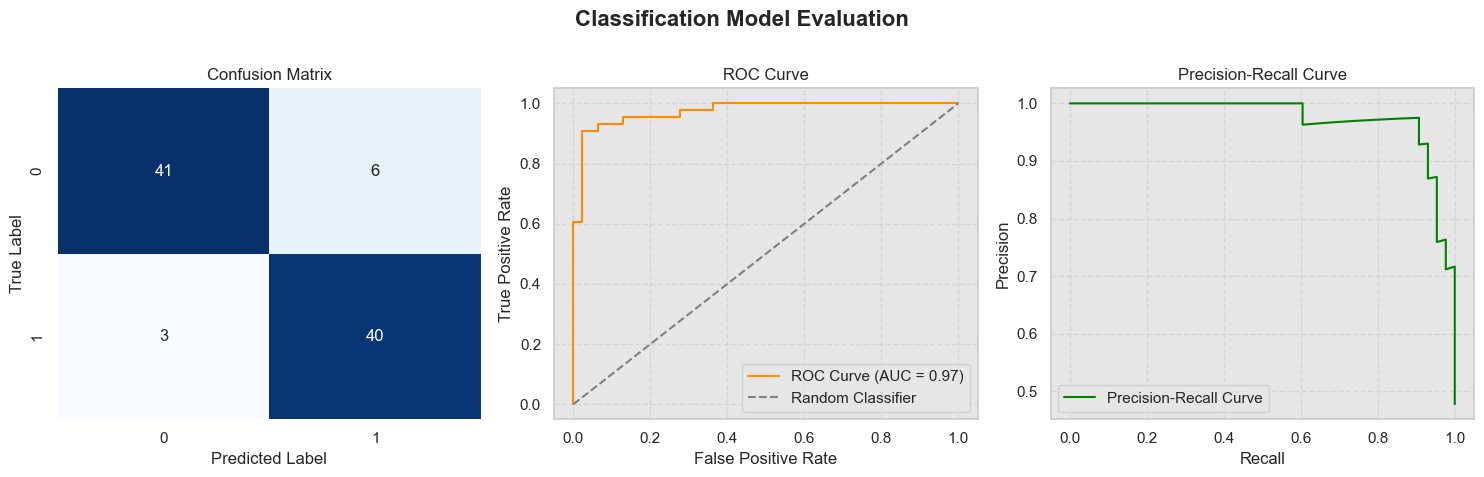

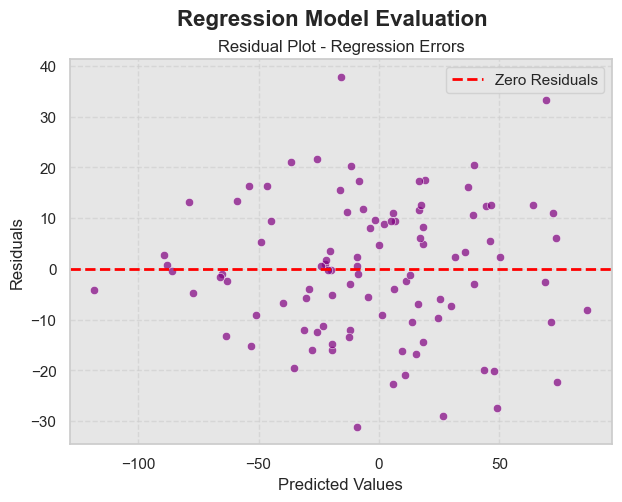


Generating Time-Series Charts...


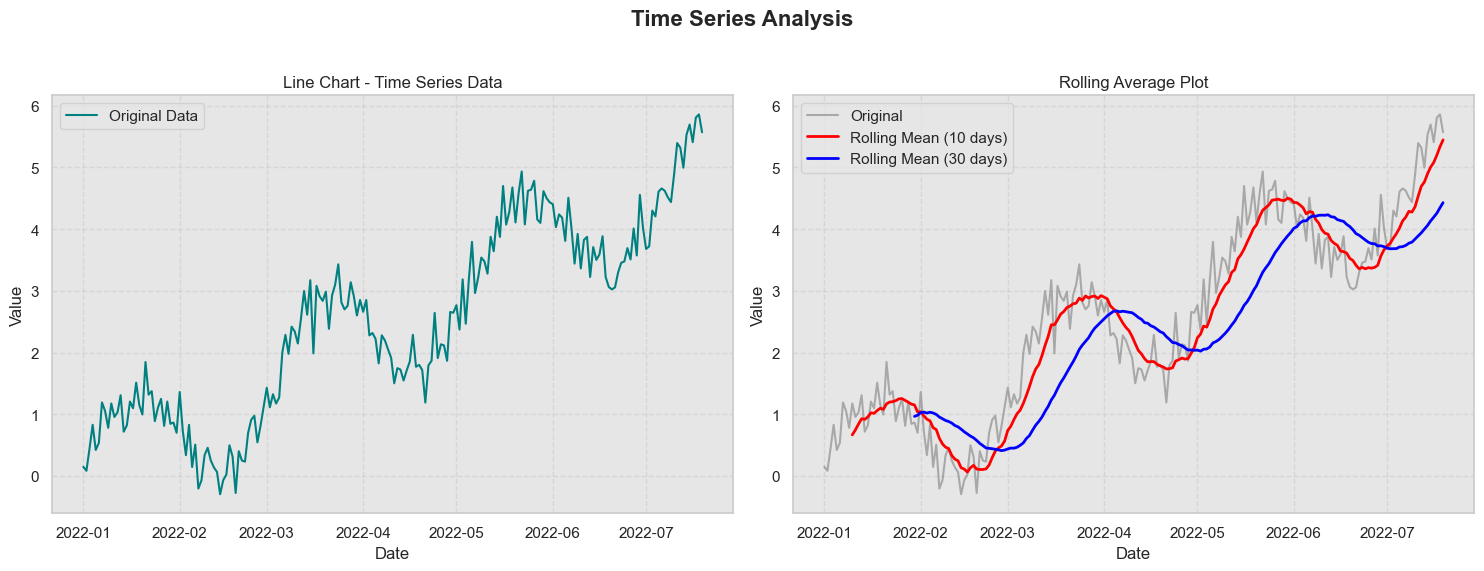

Generating ACF and PACF Plots...


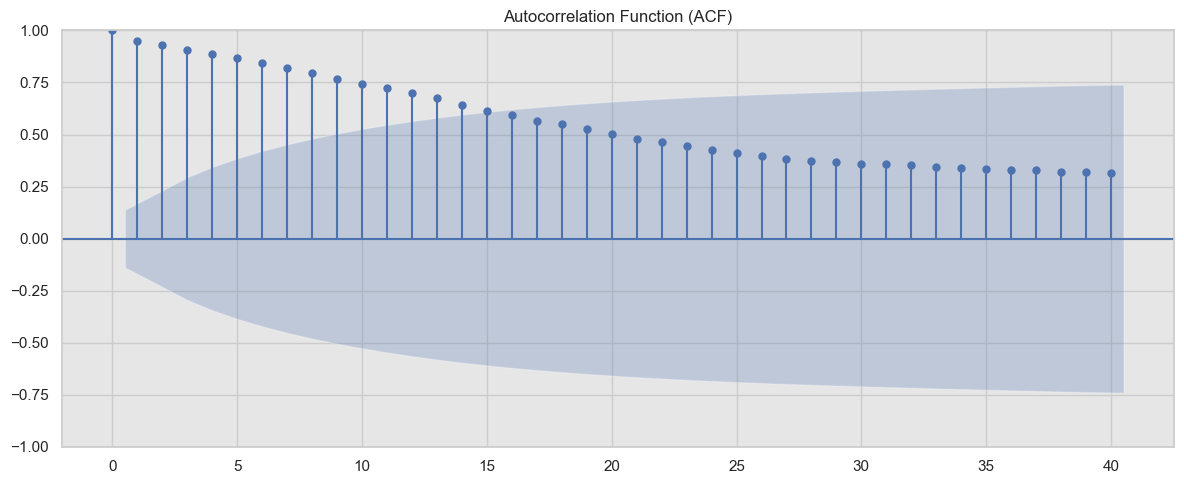

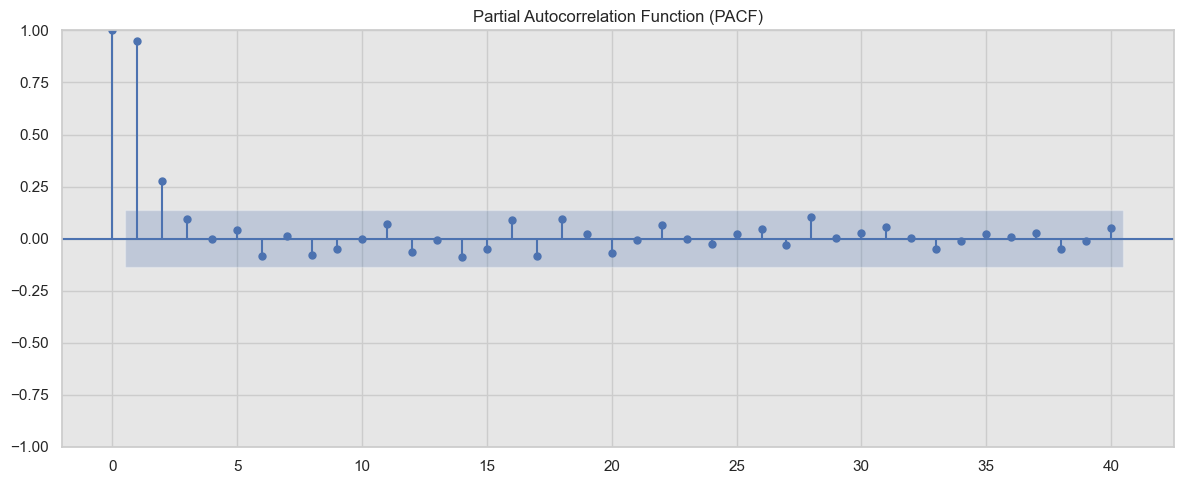


Generating Clustering & Dimensionality Reduction Charts...


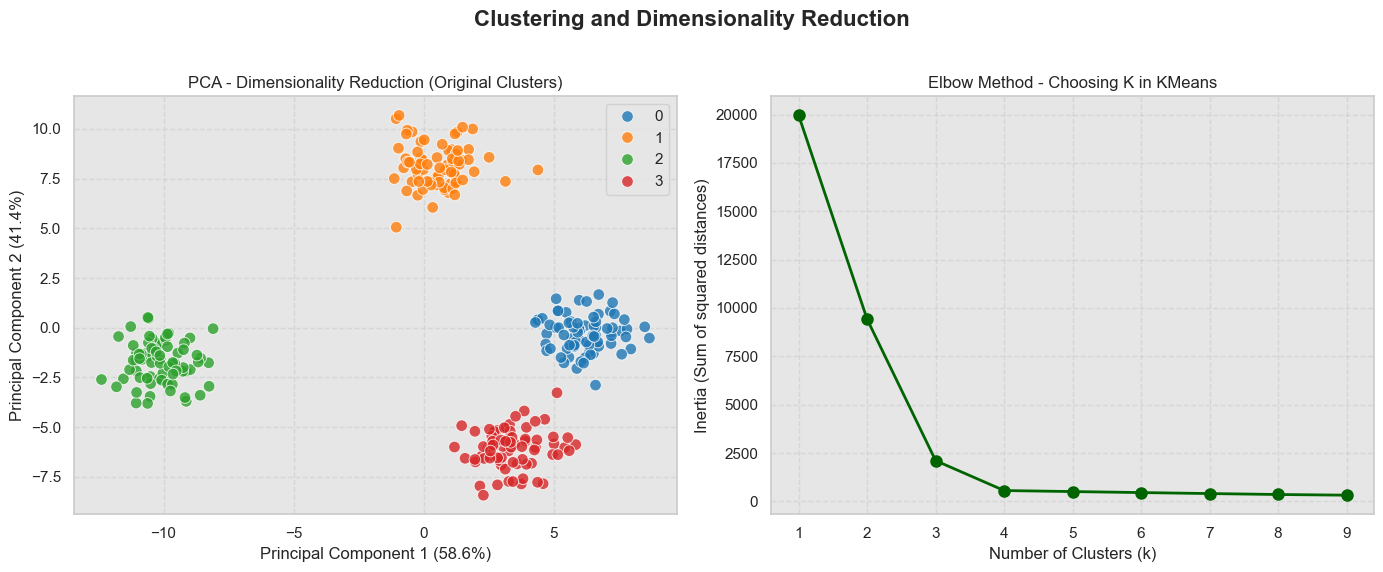


Demo Complete!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification, make_regression, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set a consistent style for all plots
sns.set(style="whitegrid", rc={"axes.facecolor": ".9"})

# ------------------------------------------------
# 1️⃣ Exploratory Data Analysis (EDA) Charts
# ------------------------------------------------
print("Generating EDA Charts...")
iris = load_iris(as_frame=True)
df = iris.frame

# --- FIX START ---
# Add the 'species' names to the DataFrame
df['species'] = iris.target_names[df['target']]
# --- FIX END ---

# Consolidate EDA plots into a single figure with subplots for better viewing
plt.figure(figsize=(18, 12)) # Increased figure size

# Histogram
plt.subplot(2, 3, 1)
sns.histplot(df["sepal length (cm)"], kde=True, color='skyblue')
plt.title("Histogram - Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(2, 3, 2)
sns.boxplot(x="species", y="sepal width (cm)", data=df, palette="viridis") # This line will now work
plt.title("Box Plot - Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")

# Bar chart
plt.subplot(2, 3, 3)
sns.countplot(x="species", data=df, palette="magma") # This line will now work
plt.title("Bar Chart - Count per Species")
plt.xlabel("Species")
plt.ylabel("Count")

# Scatter plot - moved to a subplot in the main EDA figure
plt.subplot(2, 3, 4)
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df, palette="deep")
plt.title("Scatter Plot - Sepal vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")

# Heatmap (Correlation) - also moved to a subplot
plt.subplot(2, 3, 5)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Heatmap - Feature Correlations")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Exploratory Data Analysis of Iris Dataset", y=0.98, fontsize=16, fontweight='bold')
plt.show()

# Pairplot is often better on its own due to its size and complexity
print("Generating Pair Plot...")
sns.pairplot(df, hue="species", palette="viridis")
plt.suptitle("Pair Plot - Feature Relationships (Iris Dataset)", y=1.02, fontsize=16, fontweight='bold')
plt.show()

# ------------------------------------------------
# 2️⃣ Model Evaluation Charts (Classification + Regression)
# ------------------------------------------------
print("\nGenerating Model Evaluation Charts...")

# Classification example
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {np.trapz(tpr, fpr):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Classifier')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.subplot(1, 3, 3)
plt.plot(rec, prec, label='Precision-Recall Curve', color='green')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.suptitle("Classification Model Evaluation", y=0.98, fontsize=16, fontweight='bold')
plt.show()

# Regression example
Xr, yr = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
reg = LinearRegression()
reg.fit(Xr, yr)
y_pred_r = reg.predict(Xr)
residuals = yr - y_pred_r

# Residual Plot for Regression
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_r, y=residuals, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.title("Residual Plot - Regression Errors")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.suptitle("Regression Model Evaluation", y=0.98, fontsize=16, fontweight='bold')
plt.show()

# ------------------------------------------------
# 3️⃣ Time-Series Charts
# ------------------------------------------------
print("\nGenerating Time-Series Charts...")
# Simulate time-series data
np.random.seed(42)
time = pd.date_range(start='2022-01-01', periods=200, freq='D')
# Added a small linear trend to make it more interesting for rolling average
data = pd.Series(np.sin(np.linspace(0, 20, 200)) + np.random.normal(0, 0.3, 200) + np.linspace(0, 5, 200))
data.index = time # Set index for time series plotting

plt.figure(figsize=(15, 6))

# Line Chart - Time Series
plt.subplot(1, 2, 1)
plt.plot(data.index, data, label='Original Data', color='teal')
plt.title("Line Chart - Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Rolling Average
plt.subplot(1, 2, 2)
plt.plot(data.index, data, alpha=0.6, label='Original', color='gray')
plt.plot(data.index, data.rolling(window=10).mean(), color='red', label='Rolling Mean (10 days)', linewidth=2)
plt.plot(data.index, data.rolling(window=30).mean(), color='blue', label='Rolling Mean (30 days)', linewidth=2)
plt.title("Rolling Average Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.suptitle("Time Series Analysis", y=0.98, fontsize=16, fontweight='bold')
plt.show()

# ACF and PACF plots are best in their own figures or a separate subplot structure
print("Generating ACF and PACF Plots...")
fig_acf, ax_acf = plt.subplots(figsize=(12, 5))
plot_acf(data, ax=ax_acf, lags=40)
ax_acf.set_title("Autocorrelation Function (ACF)")
plt.tight_layout()
plt.show()

fig_pacf, ax_pacf = plt.subplots(figsize=(12, 5))
plot_pacf(data, ax=ax_pacf, lags=40)
ax_pacf.set_title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()


# ------------------------------------------------
# 4️⃣ Clustering & Dimensionality Reduction Charts
# ------------------------------------------------
print("\nGenerating Clustering & Dimensionality Reduction Charts...")

# PCA Visualization
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_blobs)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_blobs, palette='tab10', s=70, alpha=0.8, edgecolor='w')
plt.title("PCA - Dimensionality Reduction (Original Clusters)")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.grid(True, linestyle='--', alpha=0.6)

# Elbow Method for KMeans
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_blobs)
    inertia.append(km.inertia_)

plt.subplot(1, 2, 2)
plt.plot(K, inertia, 'o-', color='darkgreen', linewidth=2, markersize=8)
plt.title("Elbow Method - Choosing K in KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.xticks(K)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.suptitle("Clustering and Dimensionality Reduction", y=0.98, fontsize=16, fontweight='bold')
plt.show()

print("\nDemo Complete!")